In [4]:
import os
import pandas as pd
from pathlib import Path

from arcgis.gis import GIS
from arcgis.learn import RetinaNet, prepare_data

In [5]:
gis = GIS('home')

In [6]:

training_data = gis.content.get('ccaa060897e24b379a4ed2cfd263c15f')
training_data

<Item title:"vehicle_detection_and_tracking" type:Image Collection owner:api_data_owner>

In [7]:
filepath = training_data.download(file_name=training_data.name)

In [8]:
import zipfile
with zipfile.ZipFile(filepath, 'r') as zip_ref:
    zip_ref.extractall(Path(filepath).parent)

In [9]:
data_path = Path(os.path.join(os.path.splitext(filepath)[0]))

In [10]:
data = prepare_data(data_path, 
                    batch_size=4, 
                    dataset_type="PASCAL_VOC_rectangles", 
                    chip_size=480)

In [11]:
data.classes

['background',
 'bicycle',
 'bus',
 'car',
 'motorcycle',
 'person',
 'scooter',
 'tempo',
 'tractor',
 'truck',
 'van']

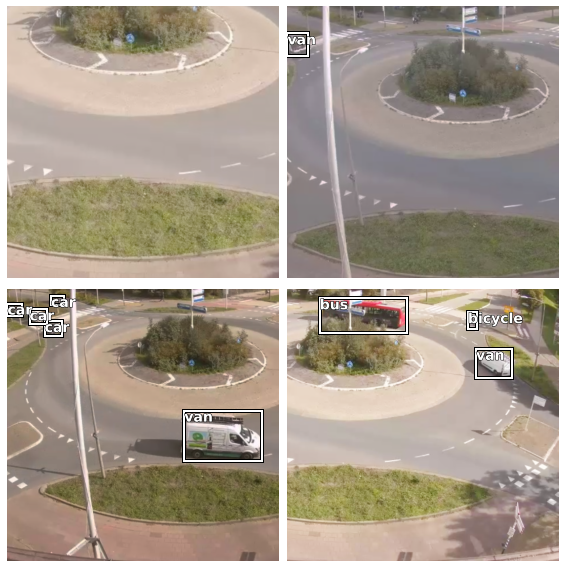

In [12]:
data.show_batch()

In [13]:
retinanet = RetinaNet(data)

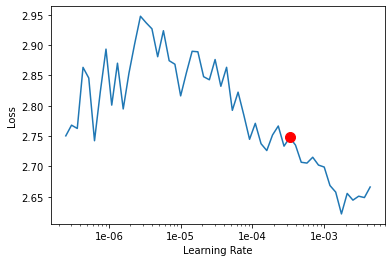

In [14]:
lr = retinanet.lr_find() #find optimal learning rate

In [15]:
lr

0.0003311311214825911

In [16]:
retinanet.fit(10, lr=lr, tensorboard=True) # Train model for X epochs

Monitor training on Tensorboard using the following command: 'tensorboard --host=DESKTOP-913SL67 --logdir="C:\Users\ianro\AppData\Local\Temp\vehicle_detection_and_tracking\training_log"'


epoch,train_loss,valid_loss,average_precision,time
0,2.479333,3.201887,0.026065,00:18
1,1.800388,2.292754,0.052054,00:18
2,1.447274,2.217399,0.030603,00:18
3,1.175041,1.984536,0.039542,00:18
4,1.032041,1.657967,0.074860,00:18
5,0.850900,1.774495,0.038503,00:18
6,0.775054,2.051821,0.020468,00:18
7,0.735151,1.791193,0.030977,00:18
8,0.615596,1.817874,0.027141,00:18
9,0.546757,1.705283,0.033418,00:19


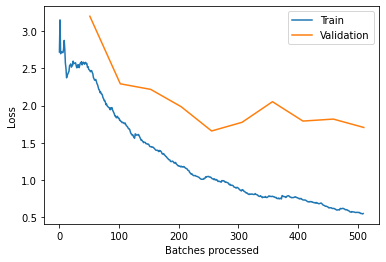

In [17]:
retinanet.learn.recorder.plot_losses()

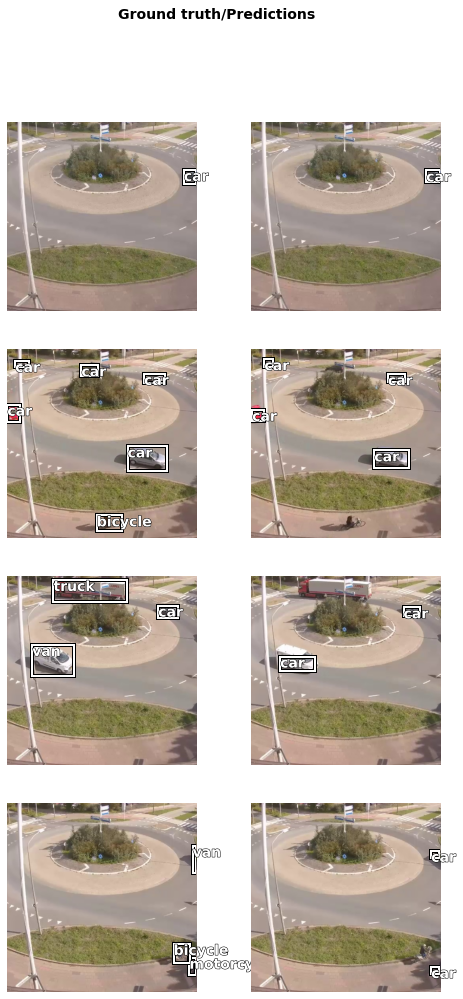

In [18]:
retinanet.show_results(thresh=0.4)

In [19]:
retinanet.average_precision_score(detect_thresh=0.4)

{'bicycle': 0.1666666716337204,
 'bus': 0.0,
 'car': 0.7497332561977839,
 'motorcycle': 0.0,
 'person': 0.0,
 'scooter': 0.0,
 'tempo': 0.0,
 'tractor': 0.0,
 'truck': 0.0,
 'van': 0.0}

In [21]:
all_classes = []
for i, bb in enumerate(data.train_ds.y):
    all_classes += bb.data[1].tolist()
    
df = pd.value_counts(all_classes, sort=False)
df.index = [data.classes[i] for i in df.index] 
df

bicycle       267
bus            23
car           747
motorcycle     32
person         26
scooter         7
tempo           1
tractor         3
truck          29
van            75
dtype: int64